# Testing Model2 on Dataset2

## Counting shapes in binary images: diamond shapes with different radii

This notebook tests the CNN model for the Counting simple shapes (circles, squares or diamonds) experiment, more specifically trained on diamond shapes with different radii - Dataset2 (see the training [Notebook](https://github.com/NLeSC/XAI/blob/master/Software/CNNcountDemo/TrainModel2DiamondsDiffSize.ipynb)) and tested on Dataset2. The 'CNNcount' code resides in a [git repository](https://github.com/NLeSC/XAI/tree/master/Software/CNNcountDemo). 

### Settings

In [11]:
# Imports
from CNNcount import shape_images as si
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
import os.path

import keras
from keras.utils import np_utils

### Loading of pre-generated data and formatting of the data and labels.

In [12]:
# filename for loading the data from the NPZ files (NumPy compressed)
same_shape_diff_radii_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diamonds_diff_radii_60k.npz"

In [13]:
# input image dimensions and number of classes
img_rows, img_cols = 64, 64
num_classes = 3

#### Data formatting

In [14]:
# load the set of NIM images with the same type and different radii and get the test subsets
if os.path.isfile(same_shape_diff_radii_fname): # already generated- just load
    print ("The file containing images of the same shape (diamonds) with different radii already exist!")
    # load from NPZ file for display
    _, _, images_test, _, _, labels_test = si.load_split_data(same_shape_diff_radii_fname)
    
    
    if keras.backend.image_data_format() == 'channels_first':
        images_test = images_test.reshape(images_test.shape[0], 1, img_rows, img_cols)

    print("Size of testing data: ", np.shape(images_test), "and labels: ", np.shape(labels_test))
else: # missing data
    print ("The file containing images of the same shape (diamonds) with different radii does not exist!")
    print("Use the GenerateShapeImages notebook to generate the experimental data.") 

The file containing images of the same shape (diamonds) with different radii already exist!
Size of testing data:  (6000, 64, 64, 1) and labels:  (6000,)


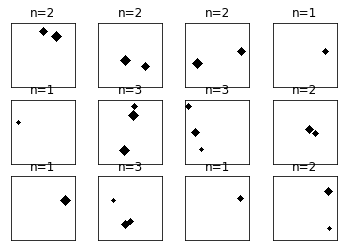

In [15]:
# plot random 12 of the test images
si.plot_12images(images_test, labels_test)

#### Labels formatting.

In [16]:
# convert class vectors to binary class matrices
labels_test = np_utils.to_categorical(labels_test-1, num_classes=None)

In [17]:
print(labels_test)
print('labels_test shape:', labels_test.shape)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
labels_test shape: (6000, 3)


#### CNN model.

In [18]:
# imports
from CNNcount import model_count_shapes as mcs

In [19]:
# filename for model saving
same_shape_diff_radius_model_fname = "/home/elena/eStep/XAI/Data/CountingShapes/model_diamonds_diff_radii.h5"

In [20]:
# load the trained model
from keras.models import load_model
model = load_model(same_shape_diff_radius_model_fname) 
print("Loaded model from disk")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Loaded model from disk


#### Evaluate on test images

In [21]:
score = model.evaluate(images_test, labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02995536981523037
Test accuracy: 0.9935


In [22]:
# constants
RMIN, RMAX = 2, 6  # shape radius
shape_type_ind = 1 # diamonds

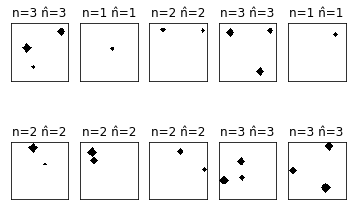

In [24]:
# generate 10 random images and predict the number of shapes using the trained model
for i in range(10):
    n = int(np.random.randint(1, 3+1))
    shapes = [(shape_type_ind, np.random.randint(RMIN, RMAX)) for _ in range(n)]
    img = si.generate_image(64, shapes, 0)    
    
    X = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
    plt.subplot(2, 5, i+1)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    predictions = model.predict(X);
    #print(predictions)
    pred = np.argmax(predictions) + 1 # we subtracted 1 before
    #print(pred)
    plt.title('n=%d n̂=%d' % (n, pred))

plt.show()